In [1]:
import pandas as pd
import numpy as np

0.03

In [2]:
df=pd.read_csv("combined.csv")

In [3]:
thevar=['s']
def convertToFloat(x):
    x=x.strip()
    if x=="-" or x=="NR" or x=='' or x=="." or x=="" or x==' ':
        return 0
    else:
        thevar[0]=x
        return float(x)

In [4]:
df["rain"]=df["Rain"].apply(convertToFloat)

In [72]:
print(df[df["rain"]!=0.0].shape[0]*100/df["rain"].shape[0])

19.45044500129612


In [97]:
import datetime
df["month"]=df["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
df["year"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
df["day"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").day)

In [98]:
df_grouped=df.groupby(["District","year","month"]).mean().reset_index()

,Date,District,Rain,rain
0,2010-01-01,Alangayam,-,0.0
1,2010-01-01,Ambur,-,0.0
2,2010-01-01,Arakkonam,-,0.0
3,2010-01-01,Arcot,-,0.0
4,2010-01-01,Gudiyatham,-,0.0
...,...,...,...,...
46287,2019-12-31,Natrampalli,-,0.0
46288,2019-12-31,TCS Mill,-,0.0
46289,2019-12-31,ACS Mill,-,0.0
46290,2019-12-31,VCS Mill,-,0.0


In [ ]:
df_grouped

In [134]:
Alangayam_df=df_grouped[df_grouped["District"]=="Alangayam"][["month","year","rain"]]


In [112]:
Alangayam_df.set_index("Date",inplace=True)

In [6]:
Alangayam_df=df[df["District"]=="Alangayam"][["Date","rain"]]

In [7]:
Alangayam_df.set_index("Date",inplace=True)
Alangayam_df

,rain
Date,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0


In [113]:
import plotly.express as px
fig = px.line(df, x="Date", y="rain", facet_col="District",facet_col_wrap=4)


In [114]:

fig.show()

0

<h3>The Squashed histogram below means that this dataset is <b>NOT</b> a bell curve(Normal) distribution. Hence It is evident that the dataset is not stationary</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E2B6E6250>]],
      dtype=object)

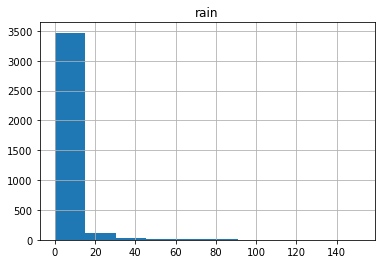

In [86]:
Alangayam_df.hist()

In [139]:
traindf=Alangayam_df[:108]
testdf=Alangayam_df[108:]

In [50]:
traindf=Alangayam_df[:2922]
testdf=Alangayam_df[2922:]

In [46]:
3652-365-365
traindf["rain"][2921-400]

0.0

In [110]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag=None,maxlag=400)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(traindf["rain"])

Results of Dickey-Fuller Test:
Test Statistic                   -2.242520
p-value                           0.191176
#Lags Used                      400.000000
Number of Observations Used    2521.000000
Critical Value (1%)              -3.432947
Critical Value (5%)              -2.862687
Critical Value (10%)             -2.567381
dtype: float64


<pre>Both the augmented Dickey-Fuller (ADF) test and the Kwiatkowski, Phillips, Schmidt and Shin (KPSS) test are tailored for detecting nonstationarity in the form of a unit root in the process. (The test equations explicitly allow for a unit root; see the refence below.) However, they are not tailored for detecting other forms of nonstationarity. Therefore, it is not surprising that they do not detect nonstationarity of the seasonal kind.

    The result of the ADF test (p

-value below 0.05) suggests that the null hypothesis of presence of a unit root can be rejected at 95% confidence level.
The result of the KPSS test (p

    -value above 0.05) suggests that the null hypothesis of absence of a unit root presence of unit root cannot be rejected at 95% confidence level.

(The bullet points are there just to confirm what you implied.)

For an accessible and intuitive yet technically precise treatment of the ADF and the KPSS tests I suggest Eric Zivot's "Modelling Financial Time Series with S-PLUS" (2nd ed., 2006) Chapter 4 "Unit Root Tests" (especially sections 4.3 and 4.4).</pre>

In [48]:

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        print(i)
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

In [51]:
traindf_diff=difference(traindf["rain"],interval=400)
testdf_diff=difference(testdf["rain"],interval=400)

400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649


In [174]:
traindf["rain"]=traindf["rain"].apply(lambda x: np.log(x))

<ipython-input-174-3f80abcf8c01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



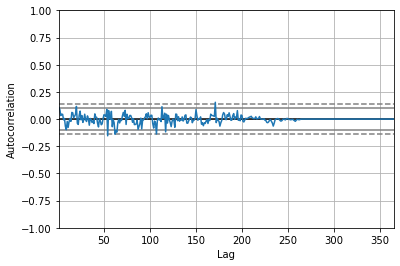

In [54]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(traindf_diff[:365])

In [69]:
traindf

,rain
Date,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2018-12-27,0.0
2018-12-28,0.0
2018-12-29,0.0


In [120]:
from statsmodels.tsa.arima_model import ARIMA
# train_log_v=list(traindf["rain"].values)
# test_log_v=list(testdf["rain"].values)
predictions=list()
model = ARIMA(traindf_diff, order=(7,0,1))
# for t in range(len(test_log_v)):
#     # LAG-3, MOVING AVG-2
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_log_v[t]
#     train_log_v.append(obs)



In [121]:
fitted=model.fit()

In [60]:
testdf_diff

4

In [122]:
fc,_,_=fitted.forecast(len(testdf))

In [151]:
exp_fc=np.exp(fc)

In [123]:
fc

array([0.11179629, 0.12068785, 0.13496162, 0.13775711, 0.14389414,
       0.14489172, 0.14908002, 0.15122298, 0.15293113, 0.15372513,
       0.15441831, 0.15477427, 0.15509249, 0.15530466, 0.15547005,
       0.1555732 , 0.15564838, 0.15569658, 0.15573125, 0.15575479,
       0.15577186, 0.15578348, 0.15579167, 0.15579724, 0.15580113,
       0.1558038 , 0.15580567, 0.15580696, 0.15580786, 0.15580849,
       0.15580892, 0.15580922, 0.15580943, 0.15580957, 0.15580967,
       0.15580974, 0.15580979, 0.15580982, 0.15580985, 0.15580986,
       0.15580987, 0.15580988, 0.15580989, 0.15580989, 0.15580989,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 ,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 ,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 ,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 ,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 ,
       0.1558099 , 0.1558099 , 0.1558099 , 0.1558099 , 0.15580

In [124]:
inverted = [inverse_difference(traindf["rain"][i], fc[i]) for i in range(len(fc))]

In [125]:
from sklearn.metrics import mean_absolute_error

In [127]:
mean_absolute_error(testdf["rain"],inverted)

4.143719004261452

In [128]:
d={"orig":testdf["rain"],"pred":inverted}
pd.DataFrame(d)

,orig,pred
Date,,
2018-01-01,0.0,0.111796
2018-01-02,0.0,0.120688
2018-01-03,0.0,0.134962
2018-01-04,0.0,0.137757
2018-01-05,0.0,0.143894
...,...,...
2019-12-27,0.0,6.855810
2019-12-28,0.0,7.755810
2019-12-29,0.0,0.155810


In [130]:
inverted

[0.11179628537553811,
 0.12068784656047318,
 0.1349616192662827,
 0.13775710837680938,
 0.1438941424168937,
 0.14489172134635667,
 0.1490800217696785,
 0.15122298279410445,
 0.15293113282074994,
 0.15372512857139176,
 0.15441830795530337,
 0.15477426768473032,
 0.1550924904010738,
 0.15530465587703515,
 0.15547004900062922,
 0.15557320010747164,
 0.15564837913959495,
 0.15569658447336232,
 0.15573125189459833,
 0.15575479072254728,
 0.15577185568387347,
 0.15578347671702542,
 0.1557916685103124,
 0.15579724055493444,
 0.15580112901845158,
 0.15580379758462903,
 0.15580566760306286,
 0.1558069607697972,
 0.15580786329870075,
 0.15580848689423893,
 0.15580892027026444,
 0.15580921980527113,
 0.15580942793534755,
 0.155809572151554,
 0.15580967237637333,
 0.15580974185613353,
 0.1558097900919756,
 0.15580982352279688,
 0.15580984671958462,
 0.15580986280317463,
 0.15580987396470888,
 0.15580988170629007,
 0.15580988707813453,
 0.15580989080393096,
 0.15580989338870288,
 0.1558098951814525

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testdf["rain"].values,fc)

126.12032700108062

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [56]:
mean_absolute_percentage_error(testdf["rain"].values,fc)

7044.666015181211

In [134]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(traindf).fit(smoothing_level=0.2,optimized=False)
fit2=ExponentialSmoothing(traindf,seasonal_periods=12).fit()


C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [135]:
testexp=[]
traindf2=traindf.copy()
for i in range(len(testdf)):
    fit2=ExponentialSmoothing(traindf2,seasonal_periods=12).fit()
    testexp.append(fit2.forecast(1)[0])
    d={"rain":[fit2.forecast(1)[0]],"Date":[str(fit2.forecast(1).index.date[0])]}
    temp=pd.DataFrame(d)
    temp.index=temp.Date
    temp.pop("Date")
    traindf2=pd.concat([traindf2,temp])


nda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information

In [136]:
mean_absolute_error(testdf["rain"],testexp)

3.5206459947827082

In [137]:
d={"orig":testdf["rain"],"pred":testexp}
pd.DataFrame(d)

,orig,pred
Date,,
2018-01-01,0.0,1.771350
2018-01-02,0.0,1.771350
2018-01-03,0.0,1.771350
2018-01-04,0.0,1.771350
2018-01-05,0.0,1.771349
...,...,...
2019-12-27,0.0,1.771350
2019-12-28,0.0,1.771350
2019-12-29,0.0,1.771350


In [133]:
max(testexp)

1.7713501615646992

In [94]:
fit3=Holt(traindf).fit()
fit3.forecast(120)

C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2018-01-01    0.0
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
             ... 
2018-04-26    0.0
2018-04-27    0.0
2018-04-28    0.0
2018-04-29    0.0
2018-04-30    0.0
Freq: D, Length: 120, dtype: float64

In [43]:
pd.DataFrame(fit1.forecast(1)).columns

,0
2019-11-10,7.135083


In [139]:
import numpy as np
import random
from croston import croston
import matplotlib.pyplot as plt

ts=traindf["rain"].values
y=[]
for i in range(testdf.shape[0]):
    fit_pred = croston.fit_croston(ts, 1,'original')
    y.append(fit_pred['croston_forecast'][0])
    print(i)
    print(fit_pred["croston_forecast"][0])
    ts=np.append(ts,fit_pred['croston_forecast'][0])
    


0
16.081168544299324
1
2.1992721592995323
2
2.199272148816582
3
2.199272132496973
4
2.199272108099005
5
2.199272073522565
6
2.1992720275374578
7
2.199271970326392
8
2.199271903399082
9
2.1992718289529605
10
2.1992717491770972
11
2.1992884102308308
12
2.1992883246644452
13
2.1992882376916807
14
2.1992881498603096
15
2.1992880615101833
16
2.1992879728486043
17
2.1992878840007415
18
2.1992877950417133
19
2.1992877060164377
20
2.1992876169517146
21
2.1992875278635147
22
2.199287438761347
23
2.19928734965087
24
2.1992872605354536
25
2.1992871714170996
26
2.1992870822969994
27
2.1992869931758627
28
2.1992869040541105
29
2.199286814931994
30
2.1992867258096624
31
2.1992866366872046
32
2.199286547564673
33
2.1992864584420984
34
2.1992863693195
35
2.1992862801968895
36
2.1992861910742727
37
2.199286101951653
38
2.199286012829034
39
2.1992859237064164
40
2.1992858345838013
41
2.1992857454611894
42
2.1992856563385805
43
2.199285567215975
44
2.1992854780933726
45
2.199285388970774
46
2.19928529984

In [112]:
fit_pred

array([0., 0., 0., ..., 0., 0., 0.])